In [1]:
import numpy as np
import pandas as pd

import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import lightgbm as lgb

/Users/educ71/miniconda3/envs/teste/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
path = './WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(path)

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

# O dataset nao contem valores nulos

In [6]:
total = len(df)

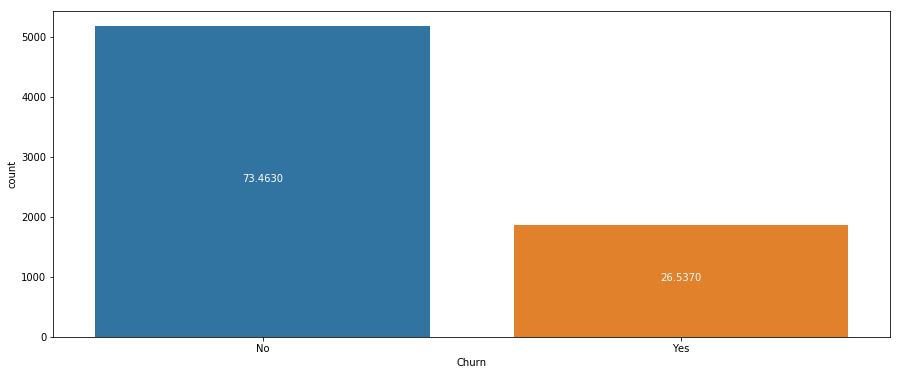

In [7]:
fig, ax = plt.subplots(figsize=(15,6))
g = sns.countplot(data=df, x='Churn')
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white') 
# plt.show()
plt.savefig('Churn_distribution.png')

In [8]:
text_label = LabelEncoder()
df['Churn'] = text_label.fit_transform(df.Churn)

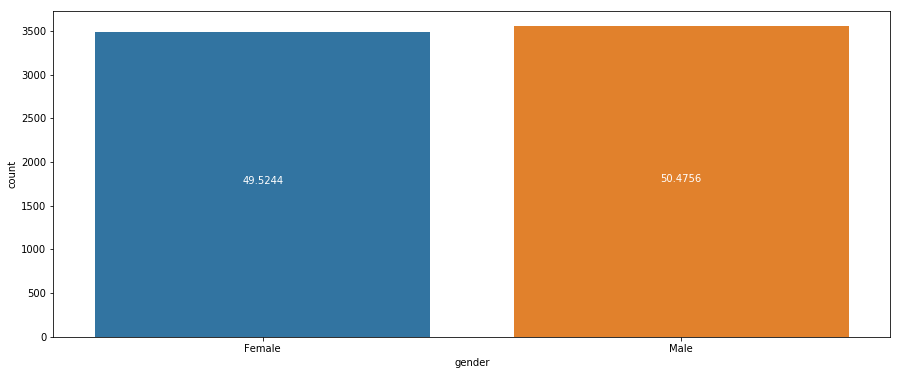

In [9]:
fig, ax = plt.subplots(figsize=(15,6))
g = sns.countplot(df.gender, ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('gende_distribution.png')

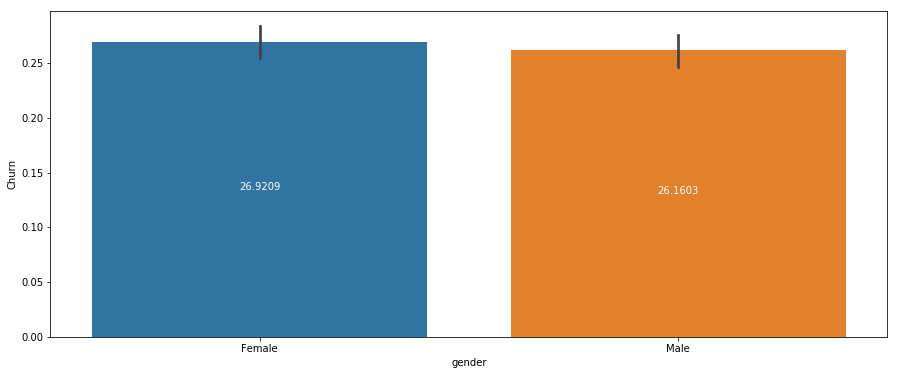

In [10]:
fig, ax = plt.subplots(figsize=(15,6))
g = sns.barplot(df.gender, df.Churn, ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('gender_churn.png')

# A quantidade de cliente de cada genero eh parecida, e a taxa de Churn tambem

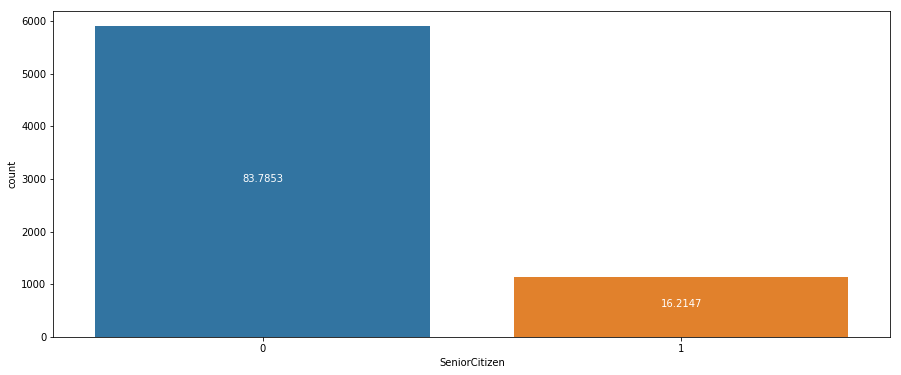

In [11]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(x='SeniorCitizen', data=df, ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('senior_citizen_dist.png')

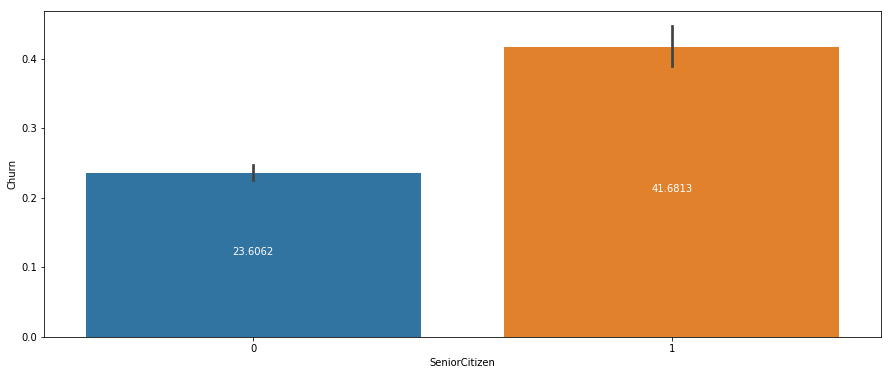

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', x='SeniorCitizen', data=df, ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('senio_citizen_churn.png')

# A quantidade de cidadaos idosos e bem inferior aos demais, porem eles possuem maior taxa de Churn

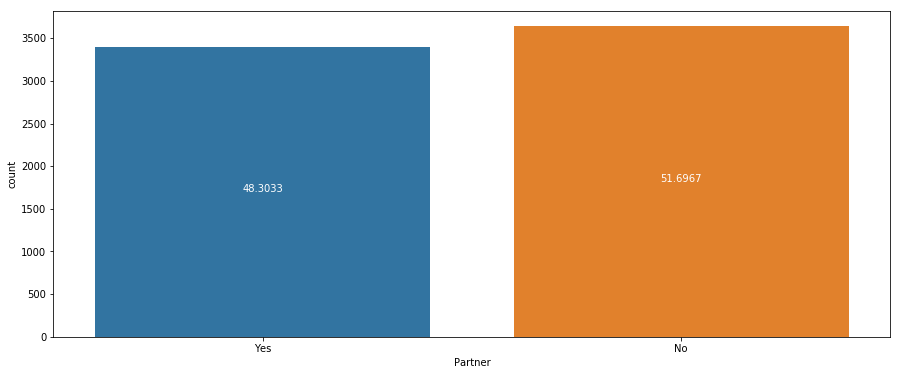

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(x='Partner', data=df, ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('partner_dist.png')

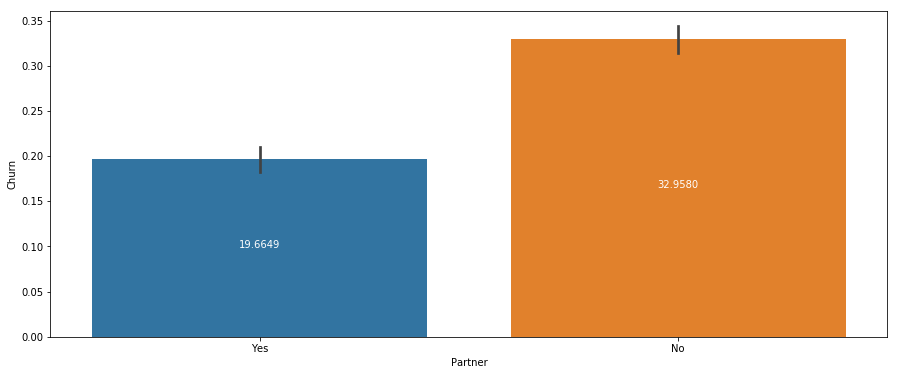

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', x='Partner', data=df, ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('partner_churn.png')

# A quantidade de clientes com companheira/o eh um pouco menor que os clientes sem companheiras/os, e taxa de Churn de clientes sem companheira/o eh maior

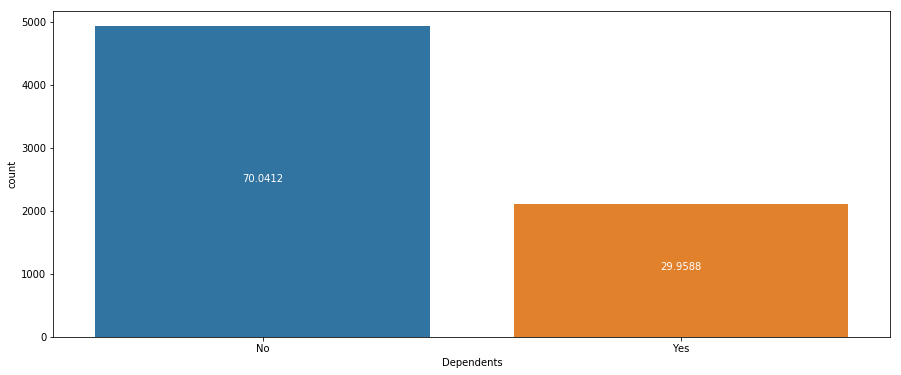

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='Dependents', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('dependents_dist.png')

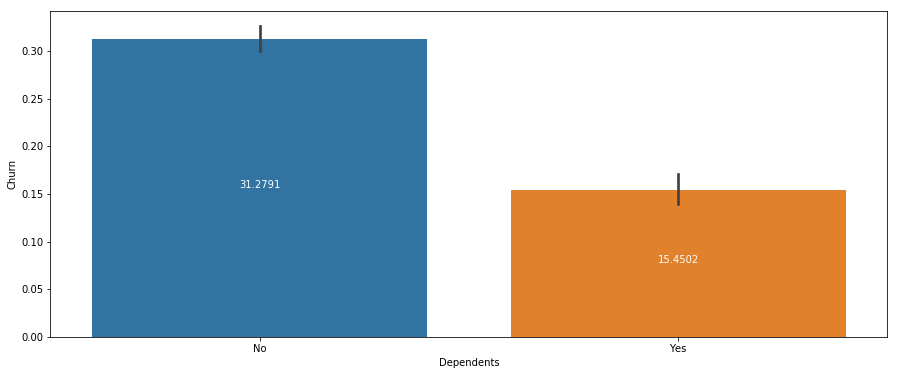

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='Dependents', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(height*100),
            ha="center", color='white')
# plt.show()
plt.savefig('dependents_churn.png')

# A quantidade de clientes com dependentes eh bem menor que os clientes sem dependentes

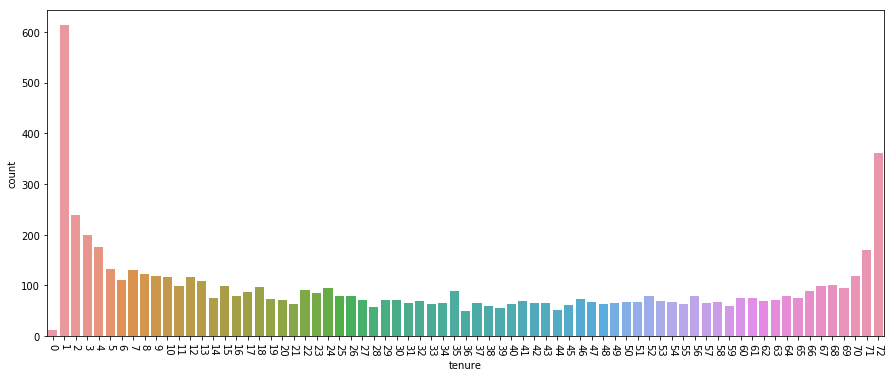

In [17]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(df.tenure, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=-90)
# plt.show()
plt.savefig('tenure_dist.png')

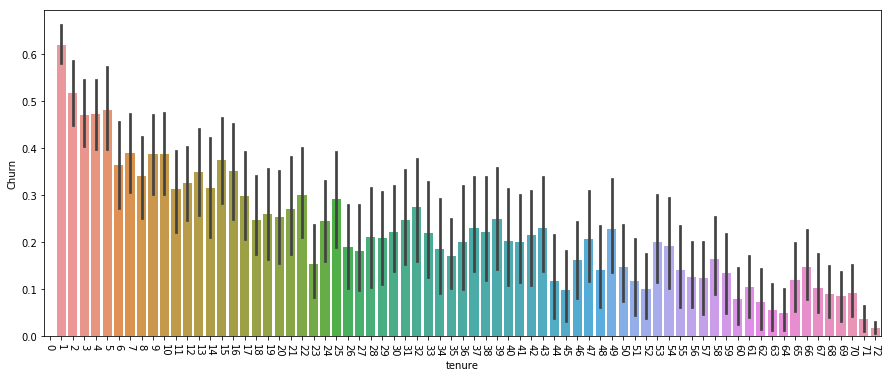

In [18]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(df.tenure, df.Churn, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=-90)
# plt.show()
plt.savefig('tenure_churn.png')

# A probabilidade de Churn eh maior em usuarios que sao clientes a pouco tempo

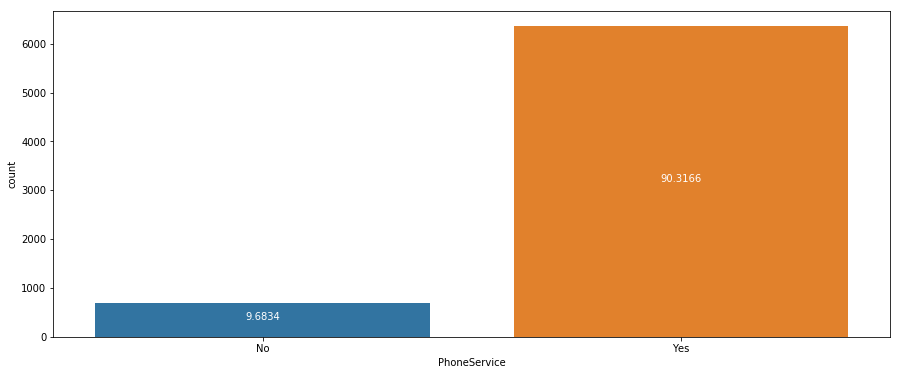

In [19]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='PhoneService', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('phone_Service_dist.png')

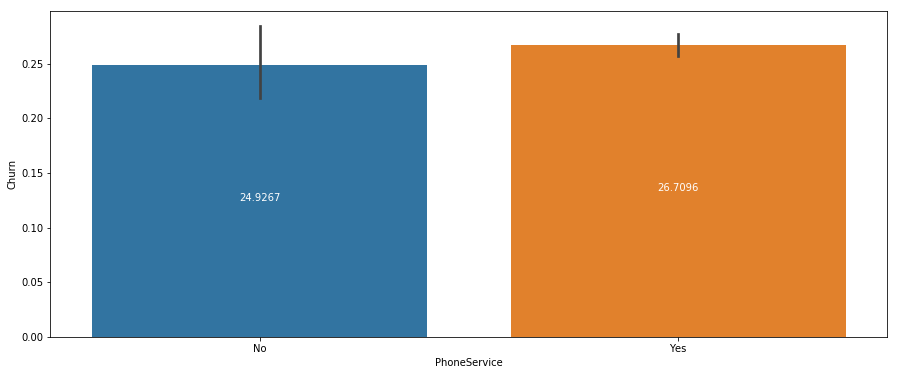

In [20]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='PhoneService', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('phone_service_churn.png')

# Maioria dos cliente possuem servico de telefone, e porcentagem de churn eh igual para ambos


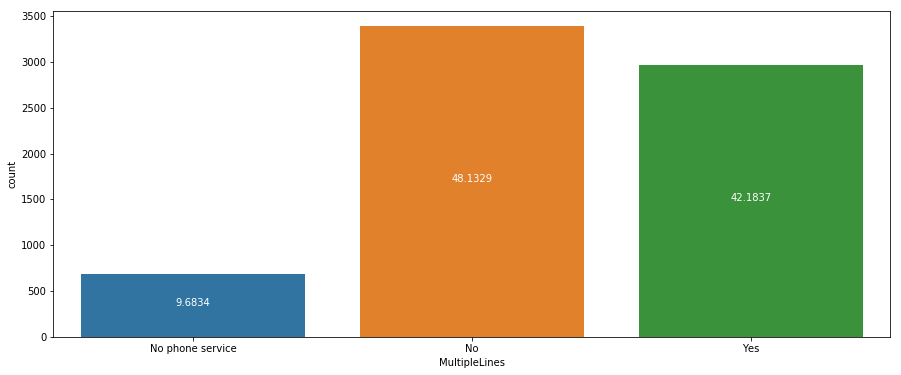

In [21]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='MultipleLines', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('multiple_lines_dist.png')

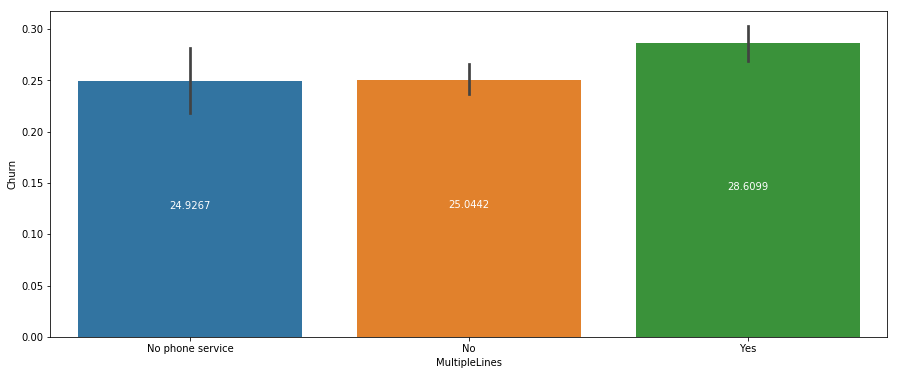

In [22]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='MultipleLines', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('multiple_lines_churn.png')

# 'No phone service' pode virar 'No'

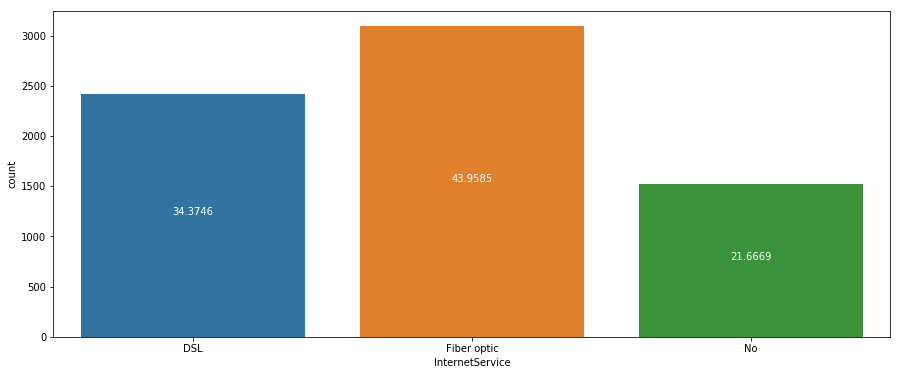

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='InternetService', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('internet_service_dist.png')

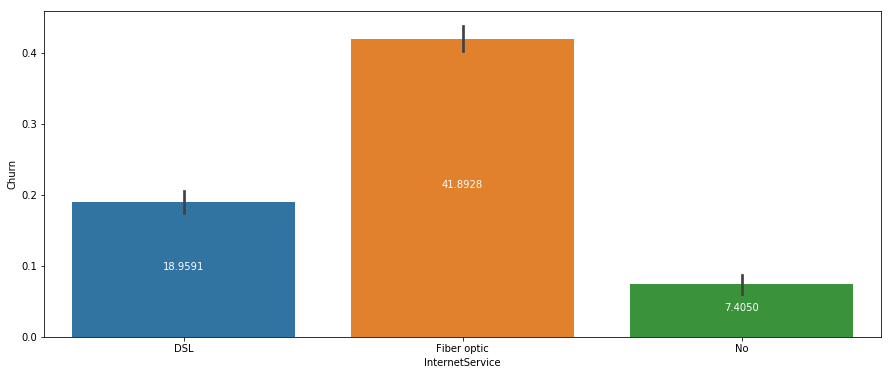

In [24]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='InternetService', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('internet_service_churn.png')

# Clientes com servico de Fibra otica tem maior porcentagem de churn

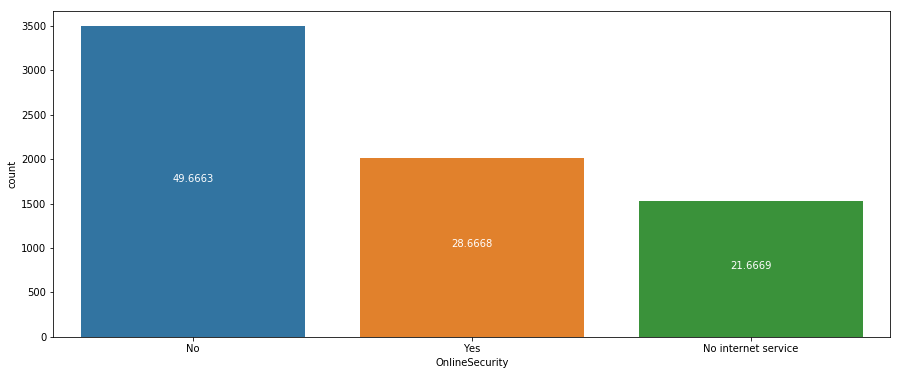

In [25]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='OnlineSecurity', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('online_security_dist.png')

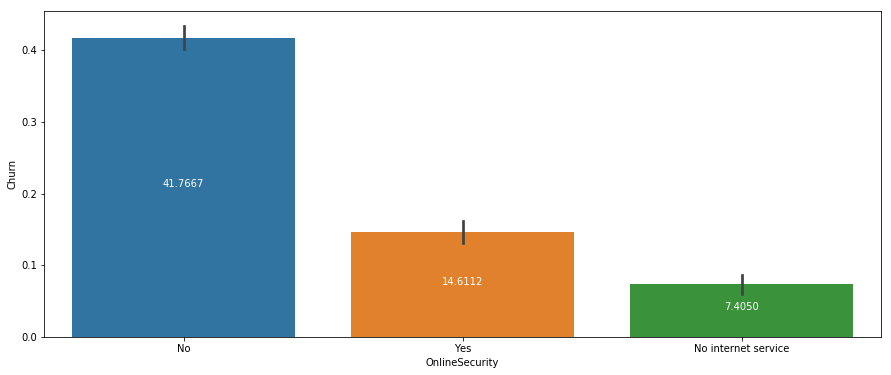

In [26]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='OnlineSecurity', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('online_security_churn.png')

# 'No internet service' pode virar 'No'. Clientes sem servico de Seguranca Online tem maior porbabilidade de Churn

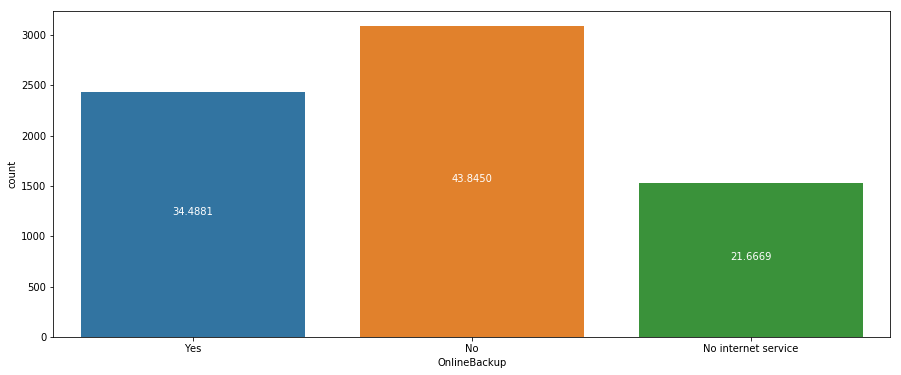

In [27]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='OnlineBackup', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('online_backup_dist.png')

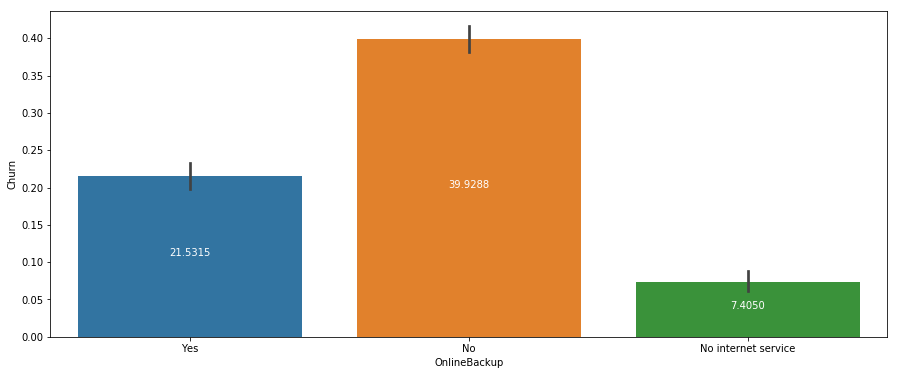

In [28]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='OnlineBackup', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('online_backup_churn.png')

# 'No internet service' pode virar 'No'. Clientes que possuem servico de Backup Online tem maior probabilidade de Churn

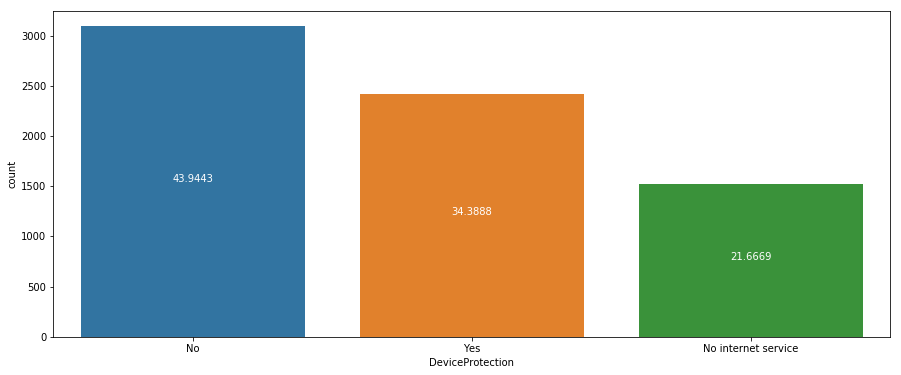

In [29]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='DeviceProtection', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('device_protection_dist.png')

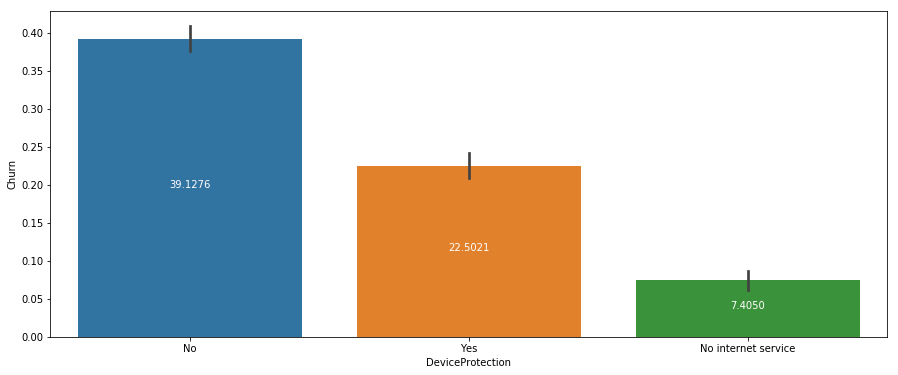

In [30]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='DeviceProtection', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('device_protection_churn.png')

# 'No internet service' pode virar 'No'. Clientes que nao possuem servico de Protecao de Dispositivo tem maior probabilidade de Churn

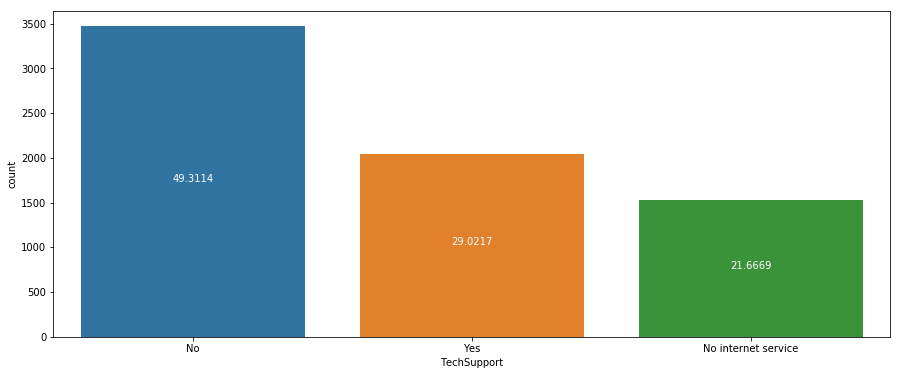

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='TechSupport', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('tech_support_dist.png')

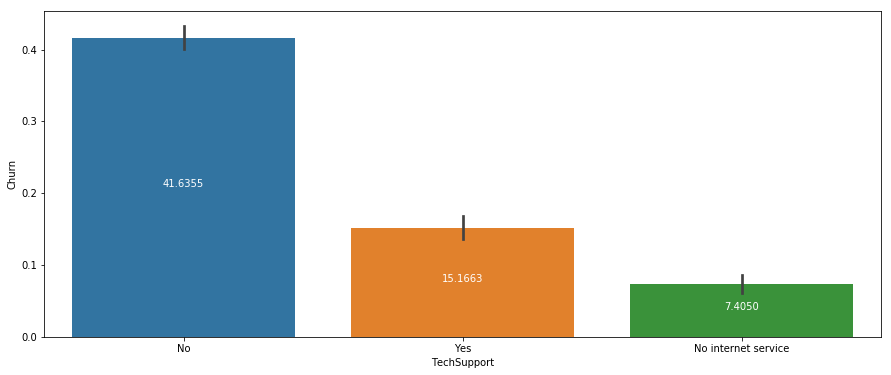

In [32]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='TechSupport', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('tech_support_churn.png')

# 'No internet service' pode virar 'No'

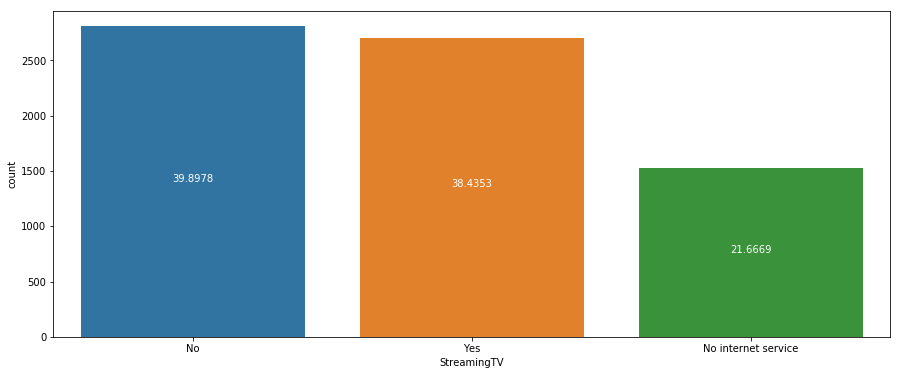

In [33]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='StreamingTV', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('streaming_tv_dist.png')

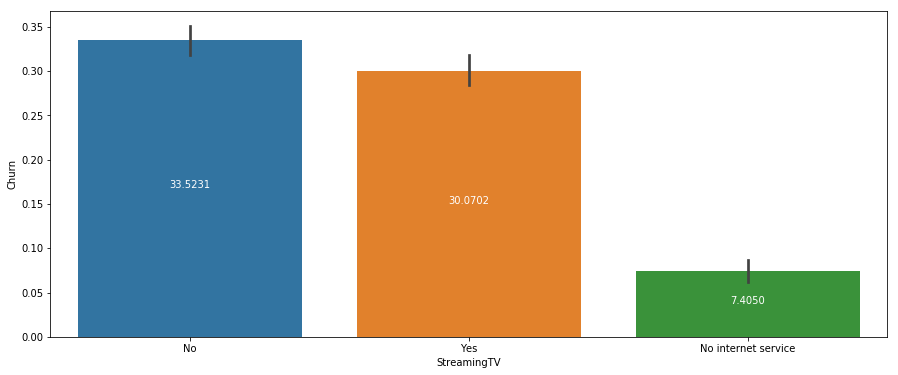

In [34]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='StreamingTV', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('streaming_tv_churn.png')

# 'No internet service' pode virar 'No'. A quantidade de cliente que possuem Streaming de TV eh menor, porem ha uma maior probabilidade de Churn desses que possuem

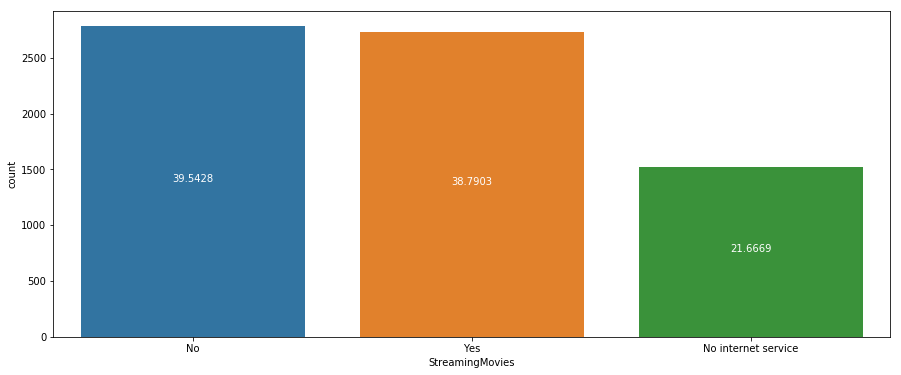

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='StreamingMovies', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('streaming_movies_dist.png')

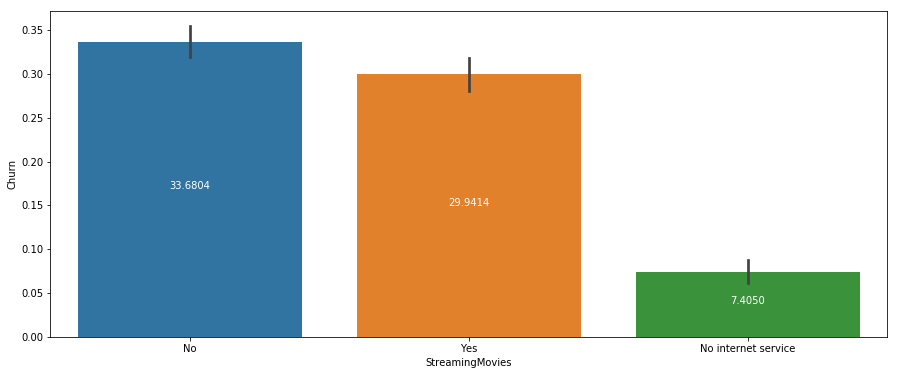

In [36]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='StreamingMovies', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('streaming_movies_churn.png')

# 'No internet service' pode virar 'No'. A quantidade de cliente que possuem Streaming de Filme eh menor, porem ha uma maior probabilidade de Churn desses que possuem

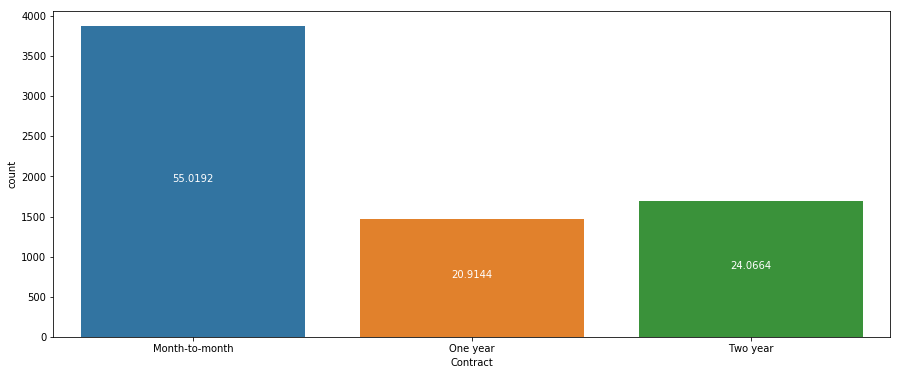

In [37]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='Contract', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('contract_dist.png')

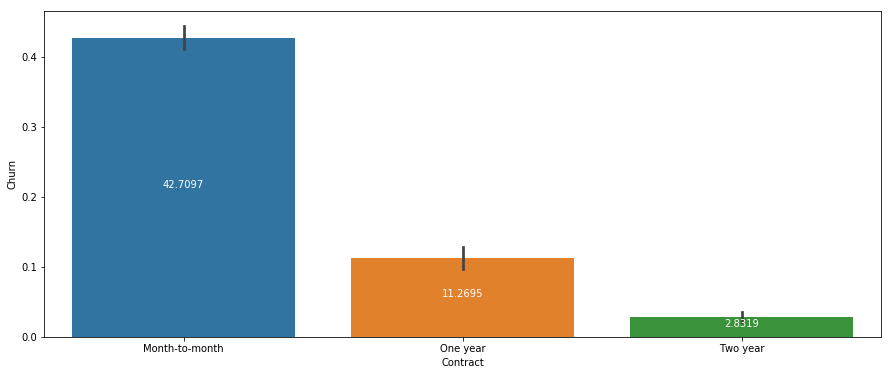

In [38]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='Contract', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('contract_churn.png')

# Clientes com contrato mensal tem maior probabilidade de Churn

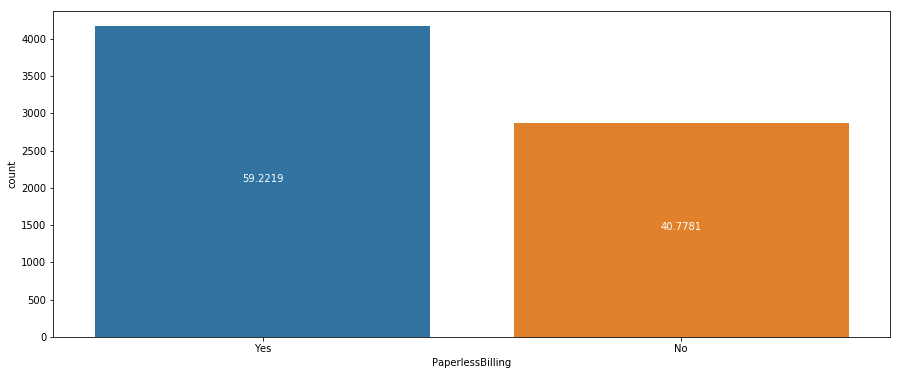

In [39]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='PaperlessBilling', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('paperless_billing_dist.png')

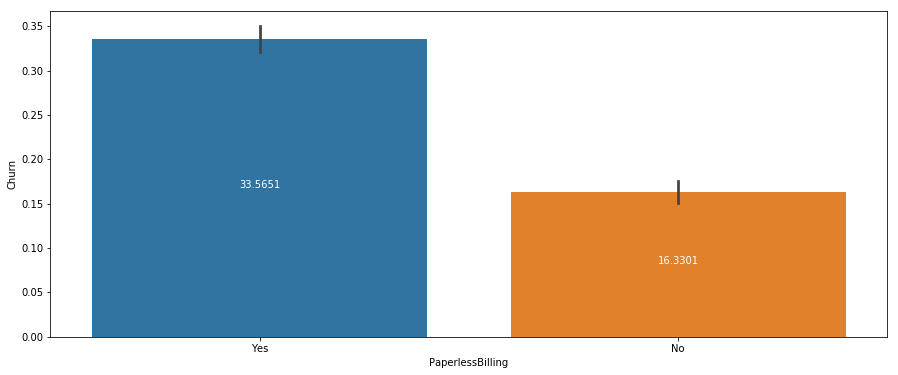

In [40]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='PaperlessBilling', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('paperless_billing_churn.png')

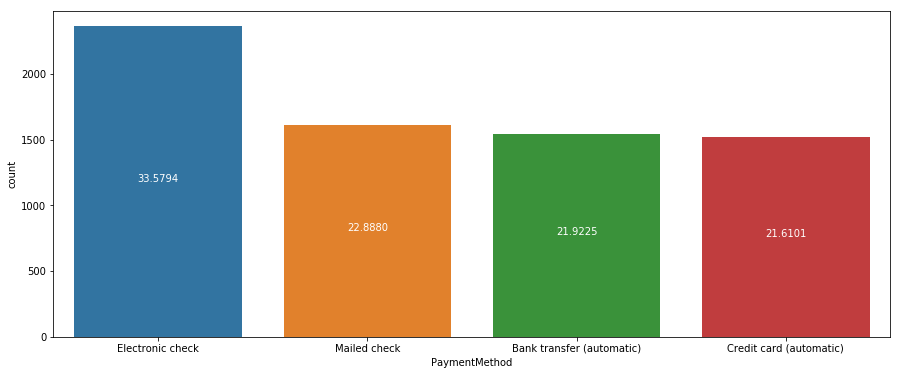

In [41]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='PaymentMethod', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('payment_method_dist.png')

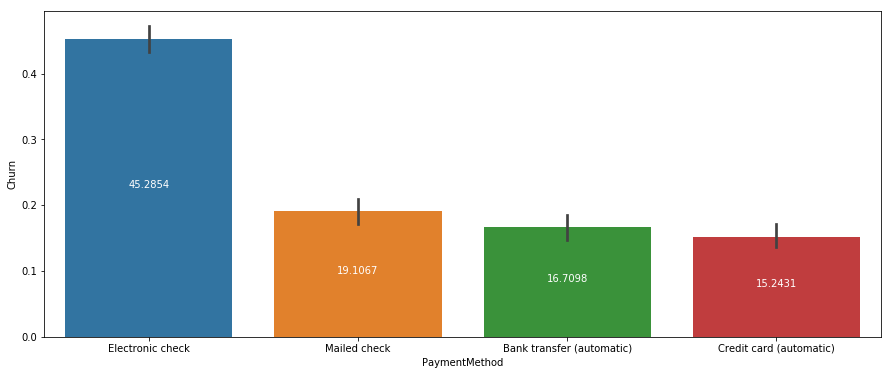

In [42]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='PaymentMethod', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('payment_method_churn.png')

# Clientes que utilizam o metodo de pagamento EletronicCheck possuem maior probabilidade de Churn

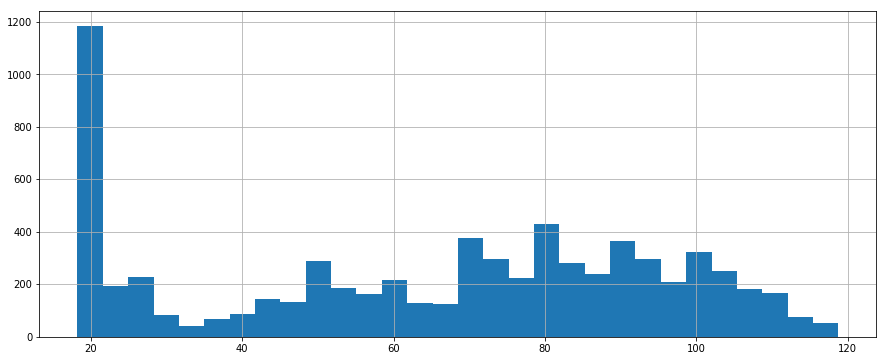

In [43]:
fig, ax = plt.subplots(figsize=(15, 6))
# sns.distplot(df.MonthlyCharges, ax=ax)
df.MonthlyCharges.hist(bins=30, figsize=(15, 6), ax=ax)
# plt.show()
plt.savefig('monthly_charges_dist.png')

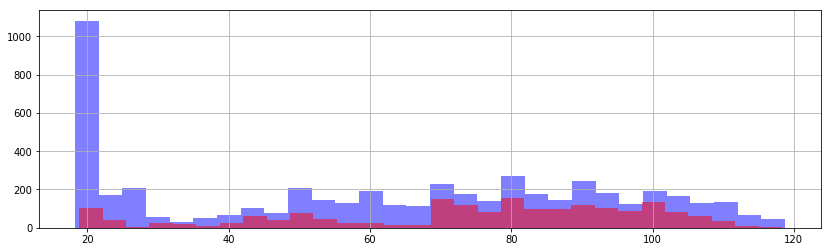

In [44]:
fig, ax = plt.subplots(1, figsize=(14, 4))
df[df.Churn == 0]['MonthlyCharges'].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == 1]['MonthlyCharges'].hist(bins=30, color="red", alpha=0.5, ax=ax)
# plt.show()
plt.savefig('monthly_charges_churn.png')

In [45]:
df.TotalCharges = df.TotalCharges.apply(lambda value: value if not value == ' ' else 0).astype('float64')

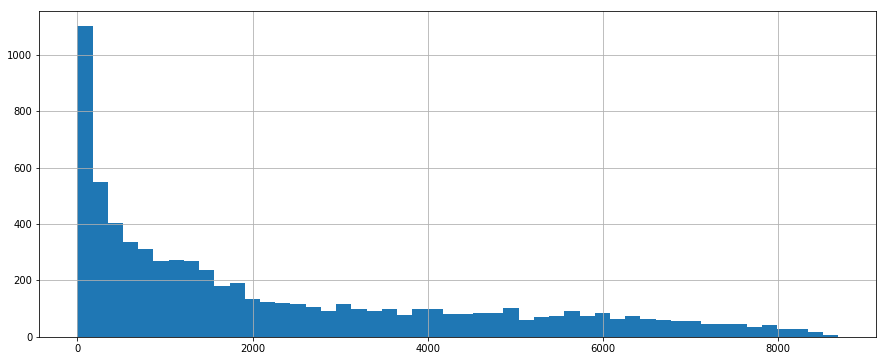

In [46]:
fig, ax = plt.subplots(figsize=(15, 6))
# sns.distplot(df.TotalCharges, ax=ax)
df.TotalCharges.hist(bins=50, figsize=(15, 6))
# plt.show()
plt.savefig('total_charges_dist.png')

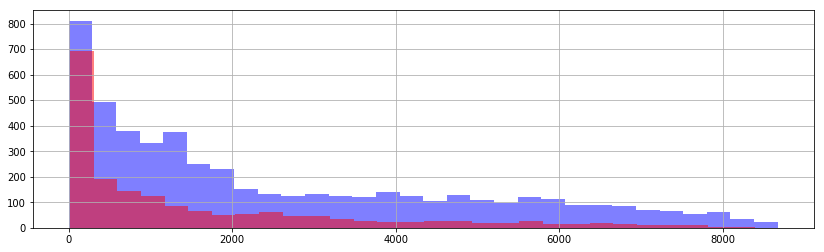

In [47]:
fig, ax = plt.subplots(1, figsize=(14, 4))
df[df.Churn == 0]['TotalCharges'].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == 1]['TotalCharges'].hist(bins=30, color="red", alpha=0.5, ax=ax)
# plt.show()
plt.savefig('total_charges_churn.png')

# A maioria das features sao categoricas, eh necessario representar essas categorias numericamente

In [48]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [49]:
df.MultipleLines = df.MultipleLines.apply(lambda x: x.split()[0])
df.OnlineBackup = df.OnlineBackup.apply(lambda x: x.split()[0])
df.OnlineSecurity = df.OnlineSecurity.apply(lambda x: x.split()[0])
df.DeviceProtection = df.DeviceProtection.apply(lambda x: x.split()[0])
df.TechSupport = df.TechSupport.apply(lambda x: x.split()[0])
df.StreamingMovies = df.StreamingMovies.apply(lambda x: x.split()[0])
df.StreamingTV = df.StreamingTV.apply(lambda x: x.split()[0])

In [50]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [51]:
df.describe(include='all')

customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7043    7043.000000    7043       7043  7043.000000   
unique        7043      2            NaN       2          2          NaN   
top     9231-ZJYAM   Male            NaN      No         No          NaN   
freq             1   3555            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    32.371149   
std            NaN    NaN       0.368612     NaN        NaN    24.559481   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count          7043          7043            7043           7043  ...   
unique            2             2               3              2  ...   
top             Yes            No     Fiber optic             No  ...   
freq           6361          4072            3096           5024  ...   
mean            NaN           NaN             NaN            NaN  ...   
std             NaN           NaN             NaN            NaN  ...   
min             NaN           NaN             NaN            NaN  ...   
25%             NaN           NaN             NaN            NaN  ...   
50%             NaN           NaN             NaN            NaN  ...   
75%             NaN           NaN             NaN            NaN  ...   
max             NaN           NaN             NaN            NaN  ...   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7043        7043        7043            7043   
unique                2           2           2               2   
top                  No          No          No              No   
freq               4621        4999        4336            4311   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod MonthlyCharges  \
count             7043             7043              7043    7043.000000   
unique               3                2                 4            NaN   
top     Month-to-month              Yes  Electronic check            NaN   
freq              3875             4171              2365            NaN   
mean               NaN              NaN               NaN      64.761692   
std                NaN              NaN               NaN      30.090047   
min                NaN              NaN               NaN      18.250000   
25%                NaN              NaN               NaN      35.500000   
50%                NaN              NaN               NaN      70.350000   
75%                NaN              NaN               NaN      89.850000   
max                NaN              NaN               NaN     118.750000   

        TotalCharges        Churn  
count    7043.000000  7043.000000  
unique           NaN          NaN  
top              NaN          NaN  
freq             NaN          NaN  
mean     2279.734304     0.265370  
std      2266.794470     0.441561  
min         0.000000     0.000000  
25%       398.550000     0.000000  
50%      1394.550000     0.000000  
75%      3786.600000     1.000000  
max      8684.800000     1.000000  

[11 rows x 21 columns]

In [52]:
categoricals = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'PaperlessBilling']

dummies = ['Contract', 'PaymentMethod', 'InternetService']

In [53]:
new_df = pd.get_dummies(df[dummies])

for cat_column in categoricals:
    text_label = LabelEncoder()
    num_label = text_label.fit_transform(df[cat_column])
    new_df[cat_column + '_cat'] = num_label

In [54]:
df = pd.concat([df, new_df], axis=1)

df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... Dependents_cat  \
0            No             DSL             No  ...              0   
1            No             DSL            Yes  ...              0   
2            No             DSL            Yes  ...              0   
3            No             DSL            Yes  ...              0   
4            No     Fiber optic             No  ...              0   

  PhoneService_cat MultipleLines_cat OnlineSecurity_cat OnlineBackup_cat  \
0                0                 0                  0                1   
1                1                 0                  1                0   
2                1                 0                  1                1   
3                0                 0                  1                0   
4                1                 0                  0                0   

  DeviceProtection_cat TechSupport_cat StreamingTV_cat  StreamingMovies_cat  \
0                    0               0               0                    0   
1                    1               0               0                    0   
2                    0               0               0                    0   
3                    1               1               0                    0   
4                    0               0               0                    0   

   PaperlessBilling_cat  
0                     1  
1                     0  
2                     1  
3                     0  
4                     1  

[5 rows x 43 columns]

In [55]:
df.describe(percentiles=[.25,.50,.75,.985])

SeniorCitizen       tenure  MonthlyCharges  TotalCharges        Churn  \
count    7043.000000  7043.000000     7043.000000   7043.000000  7043.000000   
mean        0.162147    32.371149       64.761692   2279.734304     0.265370   
std         0.368612    24.559481       30.090047   2266.794470     0.441561   
min         0.000000     0.000000       18.250000      0.000000     0.000000   
25%         0.000000     9.000000       35.500000    398.550000     0.000000   
50%         0.000000    29.000000       70.350000   1394.550000     0.000000   
75%         0.000000    55.000000       89.850000   3786.600000     1.000000   
98.5%       1.000000    72.000000      113.318500   7879.021500     1.000000   
max         1.000000    72.000000      118.750000   8684.800000     1.000000   

       Contract_Month-to-month  Contract_One year  Contract_Two year  \
count              7043.000000        7043.000000        7043.000000   
mean                  0.550192           0.209144           0.240664   
std                   0.497510           0.406726           0.427517   
min                   0.000000           0.000000           0.000000   
25%                   0.000000           0.000000           0.000000   
50%                   1.000000           0.000000           0.000000   
75%                   1.000000           0.000000           0.000000   
98.5%                 1.000000           1.000000           1.000000   
max                   1.000000           1.000000           1.000000   

       PaymentMethod_Bank transfer (automatic)  \
count                              7043.000000   
mean                                  0.219225   
std                                   0.413751   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
98.5%                                 1.000000   
max                                   1.000000   

       PaymentMethod_Credit card (automatic)  ...  Dependents_cat  \
count                            7043.000000  ...     7043.000000   
mean                                0.216101  ...        0.299588   
std                                 0.411613  ...        0.458110   
min                                 0.000000  ...        0.000000   
25%                                 0.000000  ...        0.000000   
50%                                 0.000000  ...        0.000000   
75%                                 0.000000  ...        1.000000   
98.5%                               1.000000  ...        1.000000   
max                                 1.000000  ...        1.000000   

       PhoneService_cat  MultipleLines_cat  OnlineSecurity_cat  \
count       7043.000000        7043.000000         7043.000000   
mean           0.903166           0.421837            0.286668   
std            0.295752           0.493888            0.452237   
min            0.000000           0.000000            0.000000   
25%            1.000000           0.000000            0.000000   
50%            1.000000           0.000000            0.000000   
75%            1.000000           1.000000            1.000000   
98.5%          1.000000           1.000000            1.000000   
max            1.000000           1.000000            1.000000   

       OnlineBackup_cat  DeviceProtection_cat  TechSupport_cat  \
count       7043.000000           7043.000000      7043.000000   
mean           0.344881              0.343888         0.290217   
std            0.475363              0.475038         0.453895   
min            0.000000              0.000000         0.000000   
25%            0.000000              0.000000         0.000000   
50%            0.000000              0.000000         0.000000   
75%            1.000000              1.000000         1.000000   
98.5%          1.000000              1.000000         1.000000   
max            1.000000              1

In [56]:
bins = [-1, 10, 20, 30, 40, 50, 60, np.inf]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', 'gt60']

df['cat_tenure'] = pd.cut(df.tenure, bins, labels=labels)

# df['cat_tenure'] = pd.qcut(df.tenure, q=5, labels=['Qtl_'+x for x in ['20', '40', '60', '80', '100']])

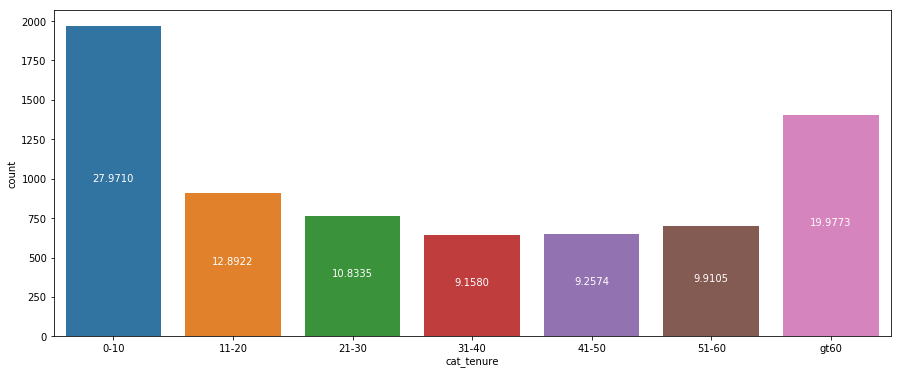

In [57]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='cat_tenure', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('tenure_cat_dist.png')

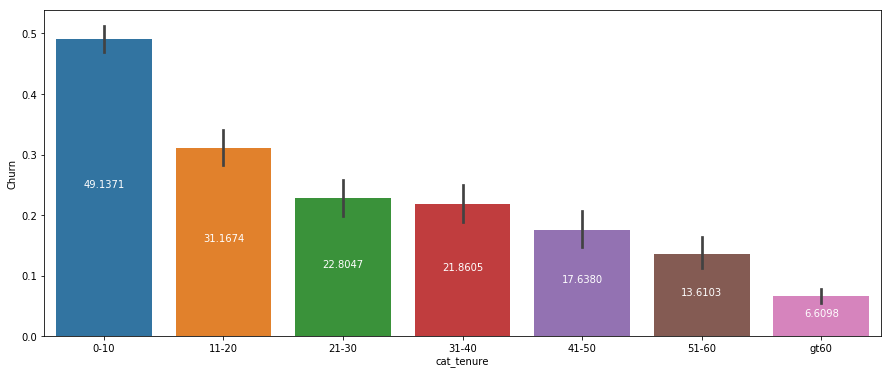

In [58]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='cat_tenure', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('tenure_cat_churn.png')

In [59]:
df['TotalCharges_cat'] = pd.qcut(df.TotalCharges, q=5, labels=['Qtl_'+x for x in ['20', '40', '60', '80', '100']])

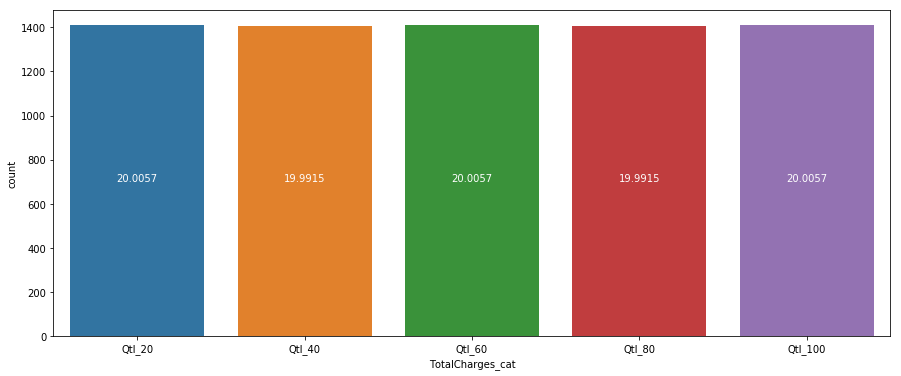

In [60]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='TotalCharges_cat', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('total_charges_cat_dist.png')

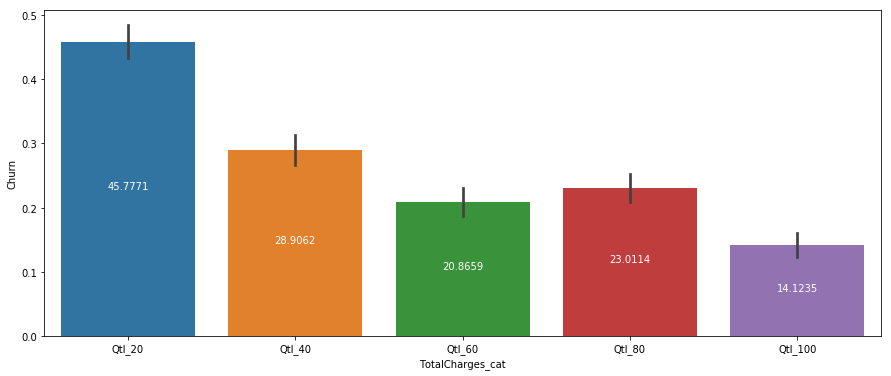

In [61]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='TotalCharges_cat', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('total_charges_cat_churn.png')

In [62]:
# new_df = pd.get_dummies(df.cat_tenure)
# df = pd.concat([df, new_df], axis=1)

df.cat_tenure = text_label.fit_transform(df.cat_tenure)

In [63]:
df.TotalCharges_cat = text_label.fit_transform(df.TotalCharges_cat)

In [64]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... MultipleLines_cat  \
0            No             DSL             No  ...                 0   
1            No             DSL            Yes  ...                 0   
2            No             DSL            Yes  ...                 0   
3            No             DSL            Yes  ...                 0   
4            No     Fiber optic             No  ...                 0   

  OnlineSecurity_cat OnlineBackup_cat DeviceProtection_cat TechSupport_cat  \
0                  0                1                    0               0   
1                  1                0                    1               0   
2                  1                1                    0               0   
3                  1                0                    1               1   
4                  0                0                    0               0   

  StreamingTV_cat StreamingMovies_cat PaperlessBilling_cat  cat_tenure  \
0               0                   0                    1           0   
1               0                   0                    0           3   
2               0                   0                    1           0   
3               0                   0                    0           4   
4               0                   0                    1           0   

   TotalCharges_cat  
0                 1  
1                 3  
2                 1  
3                 3  
4                 1  

[5 rows x 45 columns]

In [65]:
bins = [10, 28, 46, 64, 82, 100, np.inf]
labels = ['10-28','28-46', '46-64', '64-82', '82-100', 'gt100']

df['MonthlyCharges_cat'] = pd.cut(df.MonthlyCharges, bins, labels=labels)
# df['MonthlyCharges_cat'] = pd.qcut(df.MonthlyCharges, q=5, labels=['Qtl_'+x for x in ['20', '40', '60', '80', '100']])

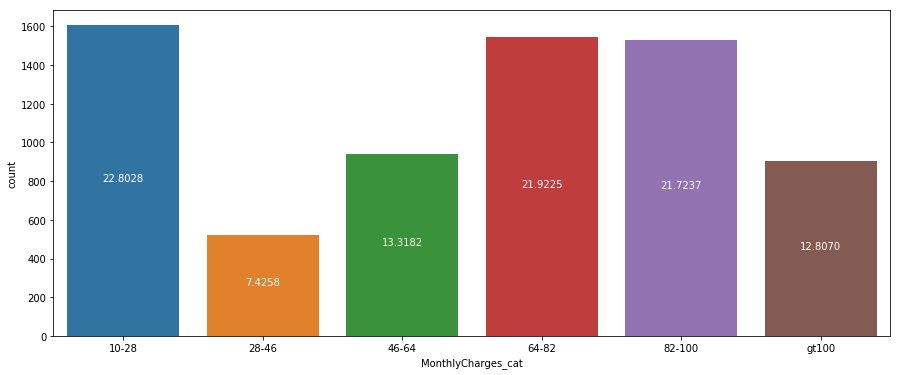

In [66]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='MonthlyCharges_cat', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('total_charges_cat_churn.png')

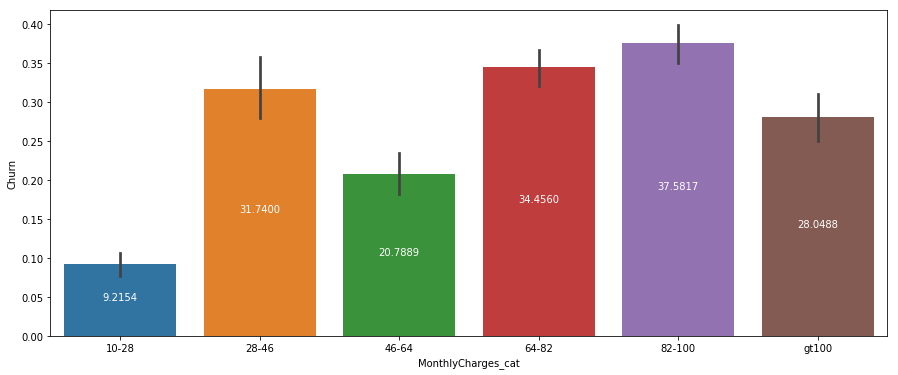

In [67]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='MonthlyCharges_cat', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('total_charges_cat_churn.png')

In [68]:
# new_df = pd.get_dummies(df.MonthlyCharges_cat)
# df = pd.concat([df, new_df], axis=1)

df.MonthlyCharges_cat = text_label.fit_transform(df.MonthlyCharges_cat)

In [69]:
df['MonthlyCharges_cat'].head()

0    1
1    2
2    2
3    1
4    3
Name: MonthlyCharges_cat, dtype: int64

In [70]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'gender_cat', 'Partner_cat', 'Dependents_cat',
       'PhoneService_cat', 'MultipleLines_cat', 'OnlineSecurity_cat',
       'OnlineBackup_cat', 'DeviceProtection_cat', 'TechSupport_cat',
       'StreamingTV_cat', 'StreamingMovies_cat', 'PaperlessBilling_cat',
       'cat_tenure', 'TotalCharges_cat', 'Month

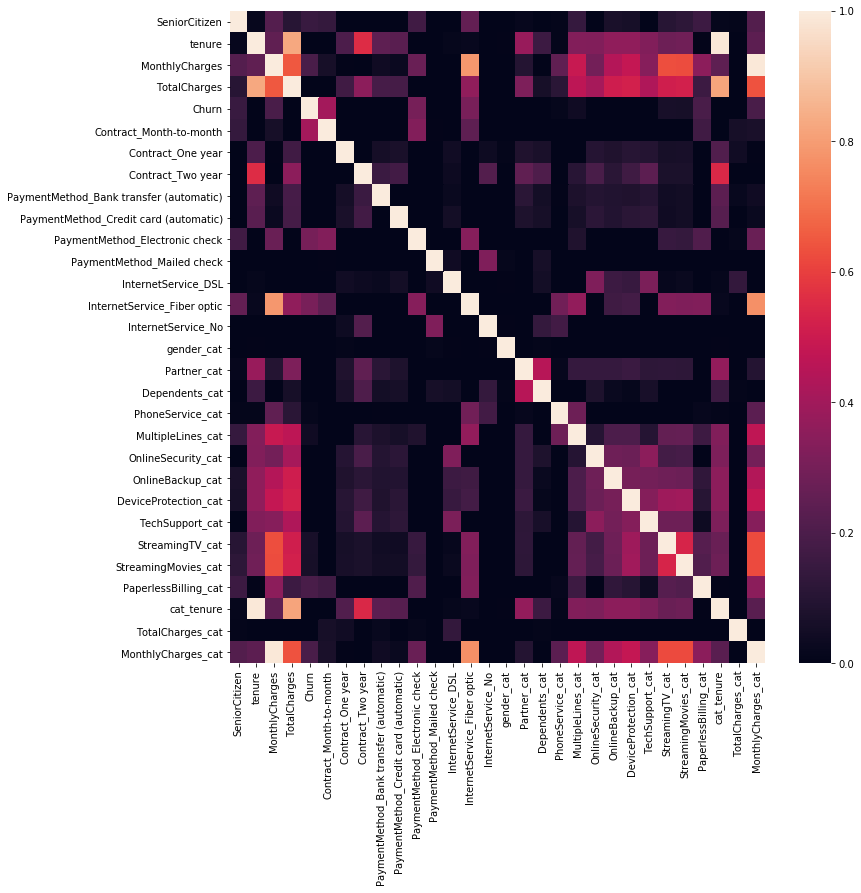

In [71]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), vmin=0, ax=ax)
plt.show()

In [72]:
data = df[[
    'SeniorCitizen', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Bank transfer (automatic)',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
    'InternetService_DSL', 'InternetService_Fiber optic',
    'InternetService_No', 'gender_cat', 'Partner_cat', 'Dependents_cat',
    'PhoneService_cat', 'MultipleLines_cat', 'OnlineSecurity_cat',
    'OnlineBackup_cat', 'DeviceProtection_cat', 'TechSupport_cat',
    'StreamingTV_cat', 'StreamingMovies_cat', 'PaperlessBilling_cat',
    'TotalCharges_cat', 
    'cat_tenure'
#     '0-10', '11-20', '21-30', '31-40', '41-50', '51-60', 'gt60',
#     '10-28', '28-46', '46-64',
#     '64-82', '82-100', 'gt100'
          ]]
label = df['Churn']

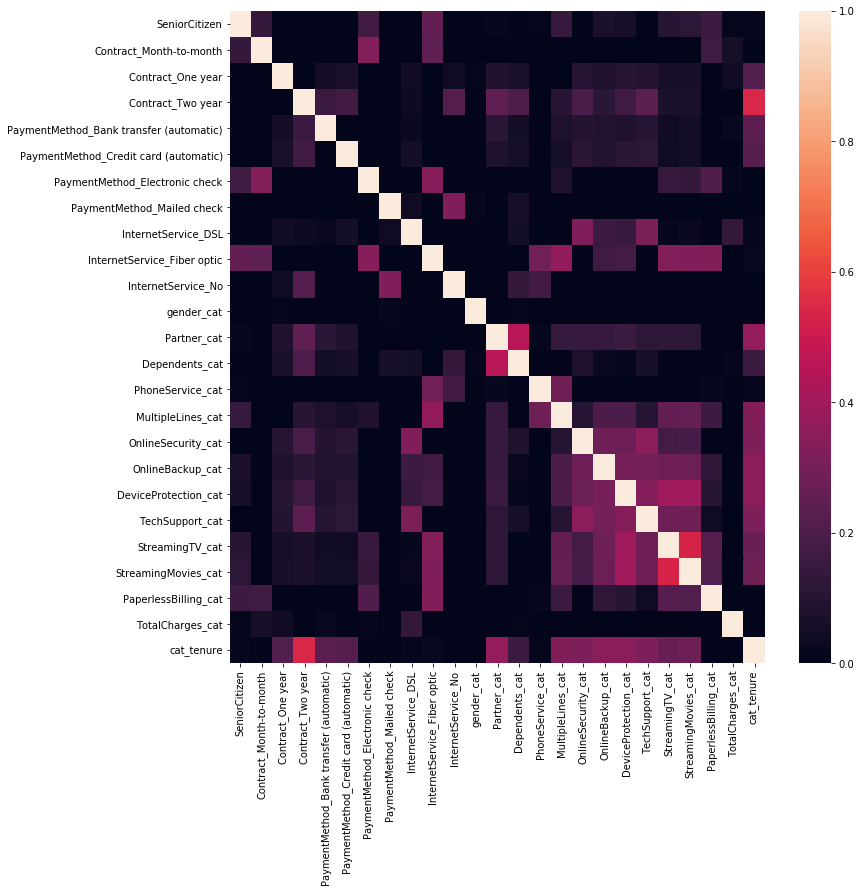

In [73]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data.corr(), vmin=0, ax=ax)
plt.show()

In [74]:
data.head()

SeniorCitizen  Contract_Month-to-month  Contract_One year  \
0              0                        1                  0   
1              0                        0                  1   
2              0                        1                  0   
3              0                        0                  1   
4              0                        1                  0   

   Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                  0                                        0   
1                  0                                        0   
2                  0                                        0   
3                  0                                        1   
4                  0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  InternetService_DSL  \
0                           0                    1   
1                           1                    1   
2                           1                    1   
3                           0                    1   
4                           0                    0   

   InternetService_Fiber optic  ...  MultipleLines_cat  OnlineSecurity_cat  \
0                            0  ...                  0                   0   
1                            0  ...                  0                   1   
2                            0  ...                  0                   1   
3                            0  ...                  0                   1   
4                            1  ...                  0                   0   

   OnlineBackup_cat  DeviceProtection_cat  TechSupport_cat  StreamingTV_cat  \
0                 1                     0                0                0   
1                 0                     1                0                0   
2                 1                     0                0                0   
3                 0                     1                1                0   
4                 0                     0                0                0   

   StreamingMovies_cat  PaperlessBilling_cat  TotalCharges_cat  cat_tenure  
0                    0                     1                 1           0  
1                    0                     0                 3           3  
2                    0                     1                 1           0  
3                    0                     0                 3           4  
4                    0                     1                 1           0  

[5 rows x 25 columns]

In [75]:
x_train, x_valid, y_train, y_valid = train_test_split(data, label, test_size=0.3)

In [76]:
modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

modelRF = RandomForestClassifier()
modelRF.fit(x_train, y_train)

modelGB = GradientBoostingClassifier()
modelGB.fit(x_train, y_train)

modelCVLR = LogisticRegression()

params = {
    'learning_rate' : 0.1,
    'num_leaves' : 255,
    'num_trees' : 500,
    'num_threads' : 16,
    'min_data_in_leaf' : 0,
    'min_sum_hessian_in_leaf' : 100
}

train_set = lgb.Dataset(x_train, label=y_train)
# valid_set = lgb.Dataset(x_valid, labels=y_valid)

modelLGB = lgb.train(params, train_set, 50)

/Users/educ71/miniconda3/envs/teste/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/educ71/miniconda3/envs/teste/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/educ71/miniconda3/envs/teste/lib/python3.7/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [77]:
predictLR = modelLR.predict(x_valid)
print('Logistic Regression: \n', classification_report(predictLR, y_valid))
print('Logistic Regression Accuracy: ', accuracy_score(predictLR, y_valid))

predictRF = modelRF.predict(x_valid)
print('Random Forest Classifier : \n', classification_report(predictRF, y_valid))
print('Random Forest Classifier Accuracy: ', accuracy_score(predictRF, y_valid))

predictGB = modelGB.predict(x_valid)
print('Gradient Boost Classifier : \n', classification_report(predictGB, y_valid))
print('Gradient Boost Classifier Accuracy: ', accuracy_score(predictGB, y_valid))

cv_predict = cross_val_predict(modelCVLR, data, y=label, cv=5)
print('LR Cross Valid : \n', classification_report(cv_predict, label))
print('LR Cross Valid Accuracy: ', accuracy_score(cv_predict, label))

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.90      0.85      0.87      1672
           1       0.53      0.65      0.58       441

   micro avg       0.80      0.80      0.80      2113
   macro avg       0.71      0.75      0.73      2113
weighted avg       0.82      0.80      0.81      2113

Logistic Regression Accuracy:  0.8045433033601515
Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.88      0.83      0.85      1675
           1       0.47      0.58      0.52       438

   micro avg       0.77      0.77      0.77      2113
   macro avg       0.67      0.70      0.68      2113
weighted avg       0.80      0.77      0.78      2113

Random Forest Classifier Accuracy:  0.7747278750591576
Gradient Boost Classifier : 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      1677
           1       0.51      0.64      0.56       

/Users/educ71/miniconda3/envs/teste/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/educ71/miniconda3/envs/teste/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/educ71/miniconda3/envs/teste/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/educ71/miniconda3/envs/teste/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/educ71/miniconda3/envs/teste/lib/python3.7/site-packages/sklearn/linear_model/logisti

LR Cross Valid : 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      5532
           1       0.53      0.66      0.59      1511

   micro avg       0.80      0.80      0.80      7043
   macro avg       0.72      0.75      0.73      7043
weighted avg       0.82      0.80      0.81      7043

LR Cross Valid Accuracy:  0.8023569501632827


In [78]:
predictLGB = modelLGB.predict(x_valid)
print('LGB : \n', classification_report(predictLGB.round(), y_valid))
print('LGB Accuracy: ', accuracy_score(predictLGB.round(), y_valid))

LGB : 
               precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      1650
         1.0       0.51      0.60      0.55       463

   micro avg       0.78      0.78      0.78      2113
   macro avg       0.69      0.72      0.70      2113
weighted avg       0.80      0.78      0.79      2113

LGB Accuracy:  0.783719829626124


In [79]:
print('Log-loss LR model: ', log_loss(y_pred=predictLR, y_true=y_valid))
print('Log-loss RF model: ', log_loss(y_pred=predictRF, y_true=y_valid))
print('Log-loss GB model: ', log_loss(y_pred=predictGB, y_true=y_valid))
print('Log-loss 0 model: ', log_loss(y_pred=[0 for i in range(len(y_valid))], y_true=y_valid))
print('Log-loss CVLR model: ', log_loss(y_pred=cv_predict, y_true=label))

Log-loss LR model:  6.750893416517918
Log-loss RF model:  7.780693180267223
Log-loss GB model:  6.996083025562315
Log-loss 0 model:  8.924832897123158
Log-loss CVLR model:  6.826407799742592


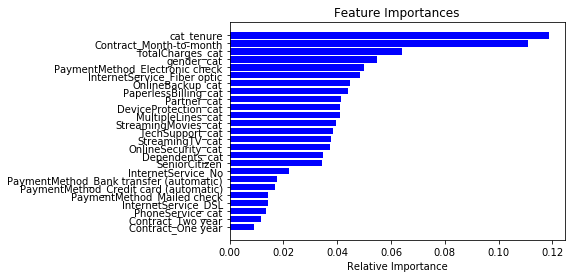

In [80]:
features = data.columns
importances = modelRF.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Text(33.0, 0.5, 'True labels')

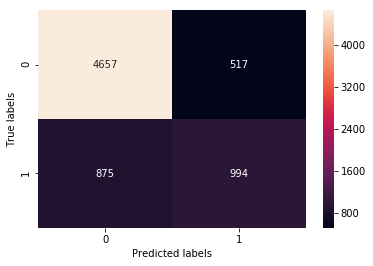

In [81]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(label, cv_predict), annot=True, ax=ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

Text(33.0, 0.5, 'True labels')

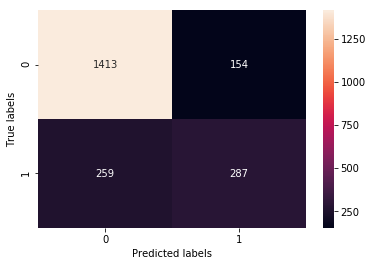

In [82]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_valid, predictLR), annot=True, ax=ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

Text(33.0, 0.5, 'True labels')

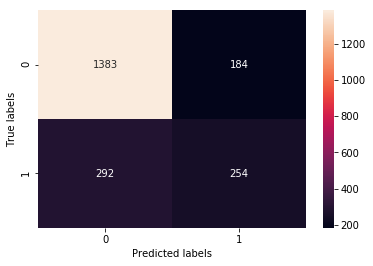

In [83]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_valid, predictRF), annot=True, ax=ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

Text(33.0, 0.5, 'True labels')

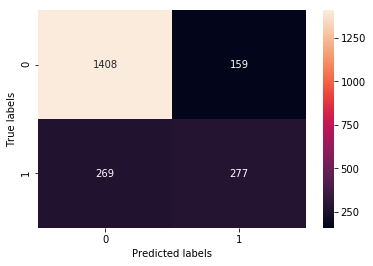

In [84]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_valid, predictGB), annot=True, ax=ax, fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

In [85]:
probs_yes_LR = modelLR.predict_proba(x_valid)[:,1]
probs_yes_RF = modelRF.predict_proba(x_valid)[:,1]
probs_yes_GB = modelGB.predict_proba(x_valid)[:,1]

In [86]:
fpLR, tpLR, thsLR = roc_curve(y_valid, probs_yes_LR)
fpRF, tpRF, thsRF = roc_curve(y_valid, probs_yes_RF)
fpGB, tpGB, thsGB = roc_curve(y_valid, probs_yes_GB)

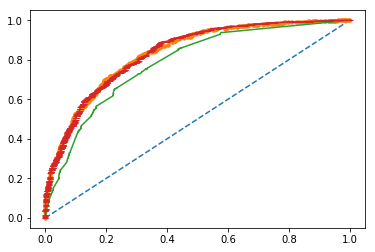

In [87]:
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpLR, tpLR, marker='.')
plt.plot(fpRF, tpRF, marker=',')
plt.plot(fpGB, tpGB, marker='_')
plt.show()

In [88]:
precisionLR, recallLR, thsLR = precision_recall_curve(y_valid, probs_yes_LR)
precisionRF, recallRF, thsRF = precision_recall_curve(y_valid, probs_yes_RF)
precisionGB, recallGB, thsGB = precision_recall_curve(y_valid, probs_yes_GB)

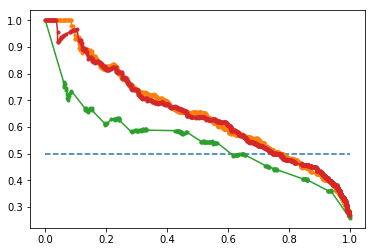

In [89]:
plt.plot([0,1], [0.5,0.5], linestyle='--')
plt.plot(recallLR, precisionLR, marker='.')
plt.plot(recallRF, precisionRF, marker='.')
plt.plot(recallGB, precisionGB, marker='.')
plt.show()